# DNN Keras, Saving Models for Deployment

## Proprocessing Training data

In [38]:
# Preprocessing data with Keras
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

train_samples = []
train_labels = []

"""
CREATING TRAINING DATA

- an experimental drug was tested on individuals from ages 13 to 65
- the trial had 2100 participants. Half were under 65 yeards old, half were over 65 years old
- 95% of patients 65 or older experienced side effects
- 95% of patients under 65 experienced no side effects

PREDICTING: new patient will experience side effects or not? - Binary classification problem
"""

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)    
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

    
size_training_data = len(train_samples)
print ("Size of training data:", size_training_data)

# converting the lists into numpy arrays before passing through the keras model
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

# Now we proprocess data! - always preprocess if your data has different units. Obviously dont normalize the labels
# Also you have to reshape 1D arrays
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

# take a look at the training samples
scaled_train_samples

Size of training data: 2100


C:\Users\Darshil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.49425287],
       [0.75862069],
       [0.10344828],
       ...,
       [0.89655172],
       [0.43678161],
       [0.63218391]])

# Preprocessing Test Data

In [39]:
test_samples = []
test_labels = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)    
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

    
size_test_data = len(test_samples)
print ("Size of test data:", size_test_data)

# converting the lists into numpy arrays before passing through the keras model
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

# Now we proprocess data! - always preprocess if your data has different units. Obviously dont normalize the labels
# Also you have to reshape 1D arrays
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

# take a look at the test samples
scaled_test_samples

Size of test data: 420


C:\Users\Darshil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.09195402],
       [0.68965517],
       [0.17241379],
       [0.87356322],
       [0.11494253],
       [0.82758621],
       [0.1954023 ],
       [1.        ],
       [0.49425287],
       [0.81609195],
       [0.03448276],
       [0.89655172],
       [0.49425287],
       [0.86206897],
       [0.26436782],
       [0.63218391],
       [0.37931034],
       [0.68965517],
       [0.12643678],
       [0.97701149],
       [0.1954023 ],
       [0.98850575],
       [0.01149425],
       [1.        ],
       [0.55172414],
       [0.72413793],
       [0.34482759],
       [0.97701149],
       [0.55172414],
       [0.71264368],
       [0.04597701],
       [0.95402299],
       [0.24137931],
       [0.8045977 ],
       [0.01149425],
       [0.67816092],
       [0.04597701],
       [0.63218391],
       [0.32183908],
       [0.97701149],
       [0.34482759],
       [0.75862069],
       [0.25287356],
       [0.93103448],
       [0.36781609],
       [0.95402299],
       [0.01149425],
       [0.689

# Importing Our Packages

In [40]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Now to train and predict using our First Simple model

In [41]:
# Creating our DNN
model = Sequential([
    Dense(16,input_shape =(1,), activation = 'relu'),
    Dense(32,activation = 'relu'),
    Dense(2,activation='softmax')
    ])

"""
You can also add layers through models like this or the method above

model.add(l4)
model.add(l5)
etc
"""

# checking our number of training parameters and visualizing our model
model.summary()

# Compiling the model
"""
# Compiling
- optimizer (learning rate)
- loss function
- metrics: array of metrics you want to use to judge the model. Look up documentation
"""
model.compile(Adam(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# The training step which includes the validaton set. validation_split automatically splits up x% of samples
# Shuffle is default true anyways,in each epoch the order is randomized but doesn't work 'with validation data
model.fit(scaled_train_samples,train_labels, batch_size = 20,validation_split=0.20, epochs=40, shuffle=True, verbose=2)    


"""
ANOTHER WAY TO CREATE A VALIDATION SET

# creating a validation set

# One way to do it
valid_set = [(0.23,0),(0.454,1)]
"""


"""
NOW WE PREDICT
- Note that model.predict in this case return 2 columns - probabiltiy of both classes
- Also note that we use model.predict_classes to actually predict the class label. 
It automatically picks the max probability as the class

Why do we need batch size for keras prediction? - for computation purposes. Predict batch at a time as opposed to all together

"""
predictions = model.predict(scaled_test_samples, batch_size=20,verbose=0)

predictions_classes = model.predict_classes(scaled_test_samples, batch_size=10,verbose=0)
# for i in predictions_classes:
#     print (i)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
Train on 1680 samples, validate on 420 samples
Epoch 1/40
 - 0s - loss: 0.6352 - acc: 0.6095 - val_loss: 0.5615 - val_acc: 0.7738
Epoch 2/40
 - 0s - loss: 0.5306 - acc: 0.7899 - val_loss: 0.4244 - val_acc: 0.9048
Epoch 3/40
 - 0s - loss: 0.4186 - acc: 0.8756 - val_loss: 0.2920 - val_acc: 0.9476
Epoch 4/40
 - 0s - loss: 0.3339 - acc: 0.9071 - val_loss: 0.2018 - val_acc: 0.9476
Epoch 5/40
 - 0s - loss: 0.29

## Measure the accuracy of our simple binary classification model using a confusion matrix

Confusion matrix, without normalization
[[199  11]
 [ 10 200]]


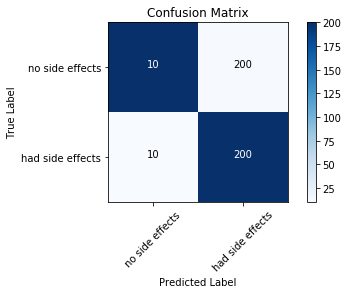

In [42]:
"""
We copy paste the code off of scikit learns wesbite to plot the confusion matrix
"""


%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predictions_classes)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, Interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print ('normalized confusion matrix')
        
    else:
        print ('Confusion matrix, without normalization')        
    print (cm)
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[1,j], horizontalalignment = 'center',
                color = 'white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
cm_plot_labels = ['no side effects', 'had side effects']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

## Saving & Loading a Model
##### It is important to learn how to save a model and load it as a pre-trained model elsewhere in other application

In [43]:
"""
MODEL.SAVE
- saves the architecture
- saves the weights
- training configuration (hyperparameter settings)
- state of the optimizer! Which means you can begin optimizing from the weights where paused!
"""
model.save('C:/Users/Darshil/gitly/Deep-Learning/My Projects/medical_trial_model.h5')

In [47]:
"""
MODEL.LOAD
- loading the model we saved
"""
from keras.models import load_model
new_model = load_model('C:/Users/Darshil/gitly/Deep-Learning/My Projects/medical_trial_model.h5')

# now lets look at the model history, weights and which optimizer it used
new_model.summary()
new_model.get_weights()
new_model.optimizer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Saving only the model (architecture) ONLY

In [56]:
# We do this by saving as a JSON file
json_string = model.to_json()

# You can also save as a yaml file
# yaml_string = model.to_yaml()

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_16", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_17", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, 

In [58]:
# Lets reconstruct the model from JSON
from keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Saving the weights ONLY
The whole here is to be able to load these weights into a new model of the SAME architecture

In [ ]:
model.save_weights('C:/Users/Darshil/gitly/Deep-Learning/My Projects/saved_medical_trial_model.h5')

# making a new model- have to explicitly doing so
model2 = Sequential([
    Dense(16,input_shape =(1,), activation = 'relu'),
    Dense(32,activation = 'relu'),
    Dense(2,activation='softmax')
    ])

# passing the pretrained weights into the new model
model2.load_weights('C:/Users/Darshil/gitly/Deep-Learning/My Projects/saved_medical_trial_model.h5')


"""
FYI 
- In order to do partial transfer learning 

"
On a layer you can call layer.get_weights() to get the weights from that layer. 
You can also call layer.set_weights(weights) to set the weights of a layer. 
So you could use get_weights() from one layer, 
and set weights in another layer with set_weights()... 
using the result from get_weights().
"

"""